# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

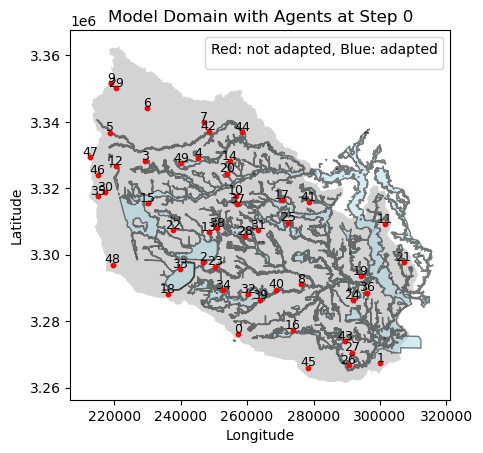

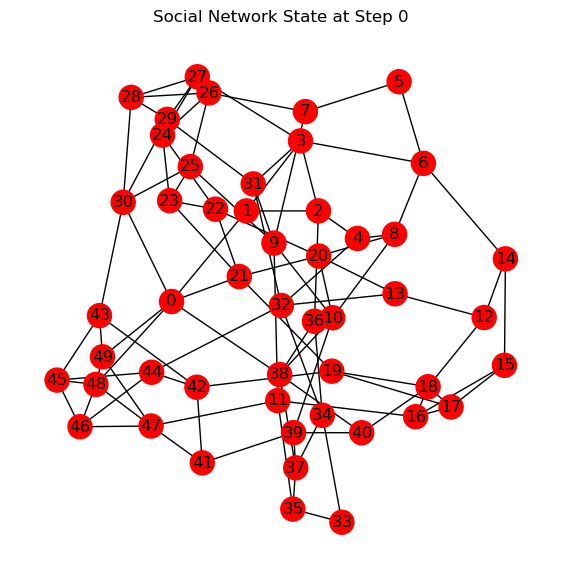

<Figure size 1000x600 with 0 Axes>

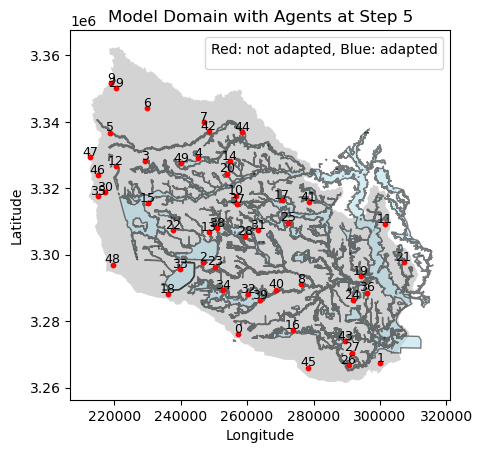

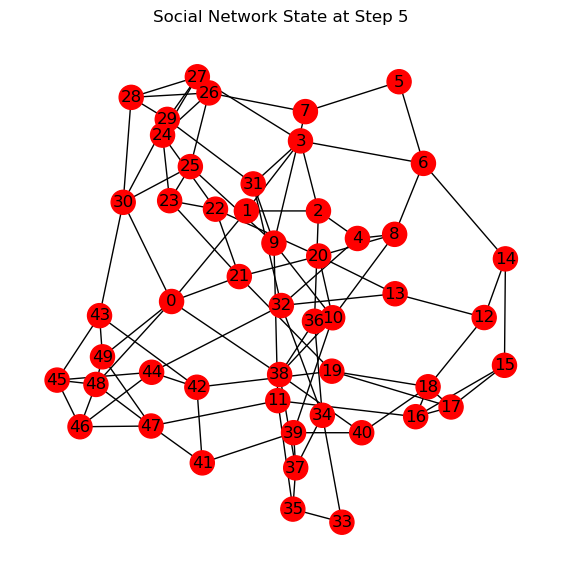

<Figure size 1000x600 with 0 Axes>

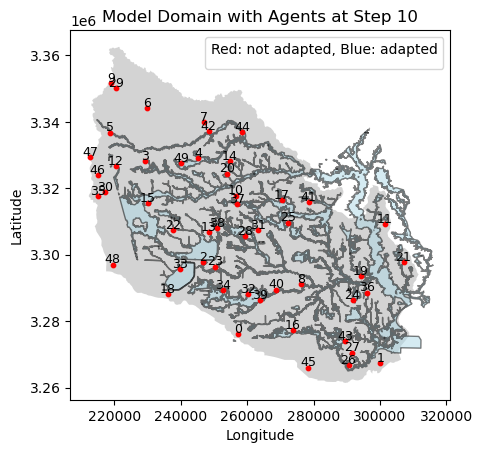

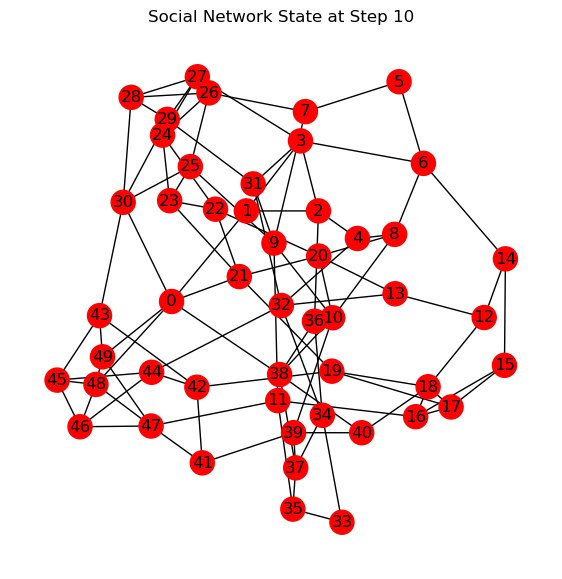

<Figure size 1000x600 with 0 Axes>

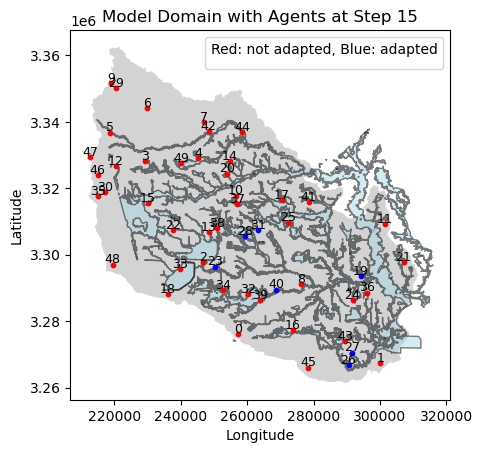

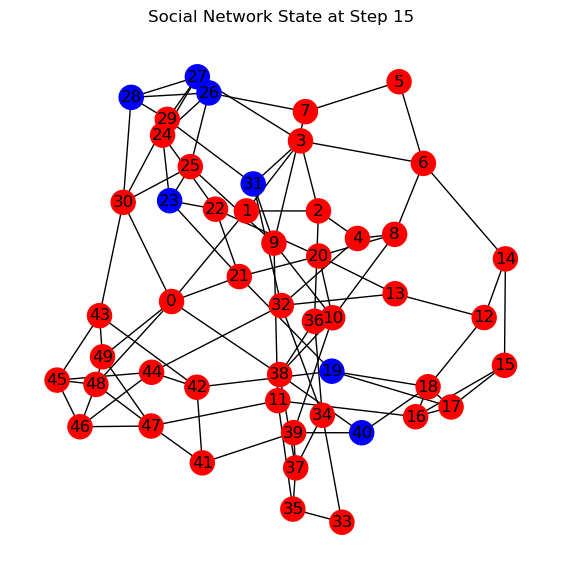

<Figure size 1000x600 with 0 Axes>

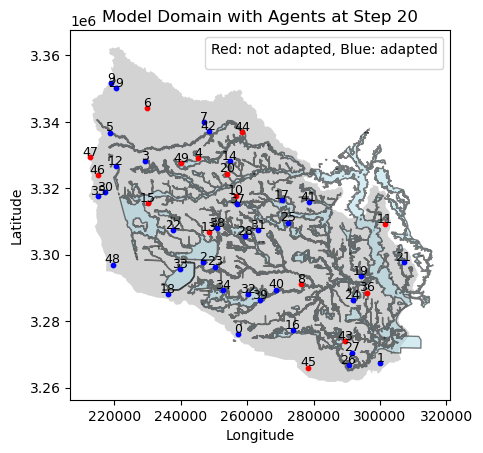

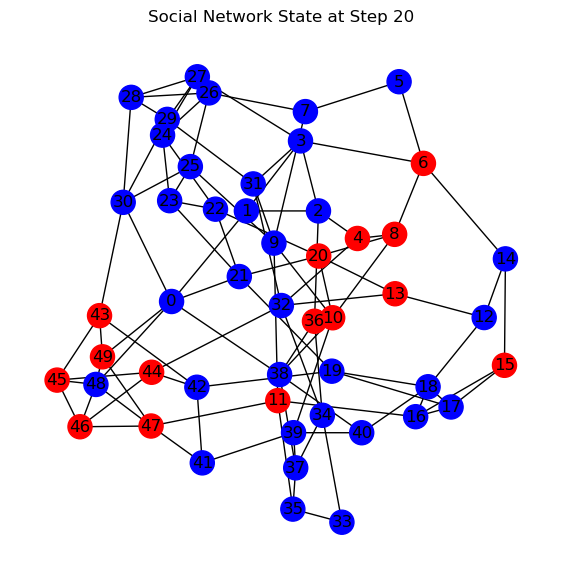

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", I_threshold=50000, policy=1.0) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [37]:
#random seed blijft het zelfde bij sensitivity analyse
#model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",seed = 42, network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"


# experiment 1
#zelfde paramaters toetsen
result = []


for i in range(100):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
    for j in range(20):
        model.step()
    output = model.datacollector.get_agent_vars_dataframe()
    output['run_number'] = i
    result.append(output)



In [39]:
import pandas as pd

ValueError: Must pass 2-d input. shape=(100, 1000, 17)

In [41]:
result_long = result[0].T.unstack().reset_index()
result_long.columns = ["Step", "AgentID", "Variable", "Value"]
#agent_wealth_long = agent_wealth.T.unstack().reset_index()
#agent_wealth_long.columns = ["Step", "AgentID", "Variable", "Value"]

In [46]:
result_long.loc[result_long['Variable']=='Worry']

,Step,AgentID,Variable,Value
7,0,0,Worry,0.216008
24,0,1,Worry,0.181767
41,0,2,Worry,0.262051
58,0,3,Worry,0.179783
75,0,4,Worry,0.33877
...,...,...,...,...
16922,19,45,Worry,0.31
16939,19,46,Worry,0.57
16956,19,47,Worry,0.33
16973,19,48,Worry,0.624159


C:\Users\thoma\AppData\Local\Temp\ipykernel_6060\2802198739.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


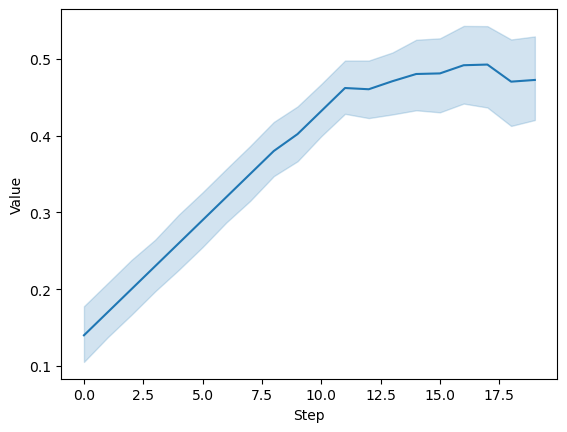

In [48]:
g = sns.lineplot(
    data=result_long.loc[result_long['Variable']=='Worry'],
    x="Step",
    y="Value",
    errorbar=("ci", 95),
    palette="tab10",
)

In [ ]:
# Create a lineplot with error bars
g = sns.lineplot(
    data=results_5s_df,
    x="Step",
    y="Gini",
    hue="N",
    errorbar=("ci", 95),
    palette="tab10",
)

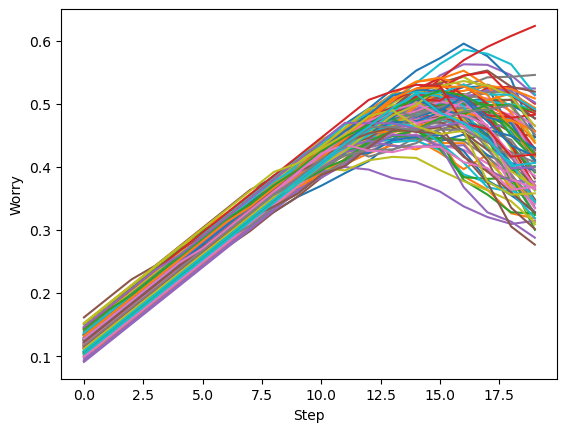

In [3]:
for run in result:
    sns.lineplot(run['Worry'].groupby('Step').mean())

In [4]:
result[0]['Worry'].groupby('Step').mean()

Step
0     0.099221
1     0.129221
2     0.159221
3     0.189221
4     0.219221
5     0.249221
6     0.279221
7     0.309221
8     0.328508
9     0.352339
10    0.370003
11    0.389986
12    0.408951
13    0.438951
14    0.464585
15    0.488985
16    0.499626
17    0.498739
18    0.476731
19    0.457147
Name: Worry, dtype: float64

In [5]:
import pandas as pd

In [6]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

11.97919862769932

In [7]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


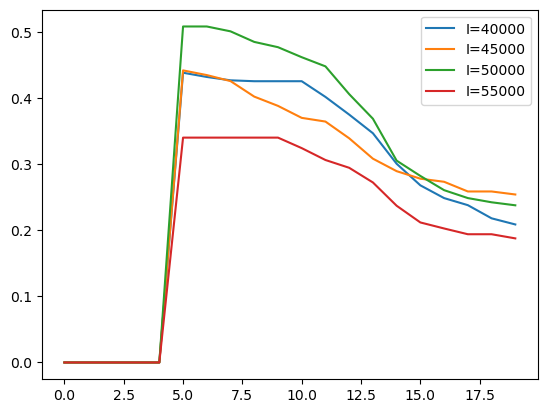

In [8]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [9]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.3551020408163265

In [10]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

1.379591836734694

In [11]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.5861224489795918

In [12]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

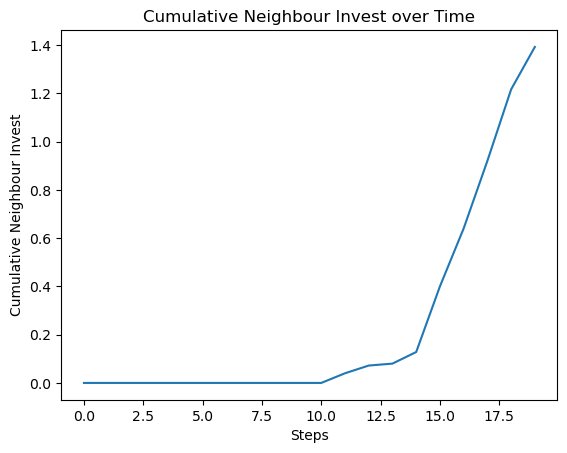

In [13]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

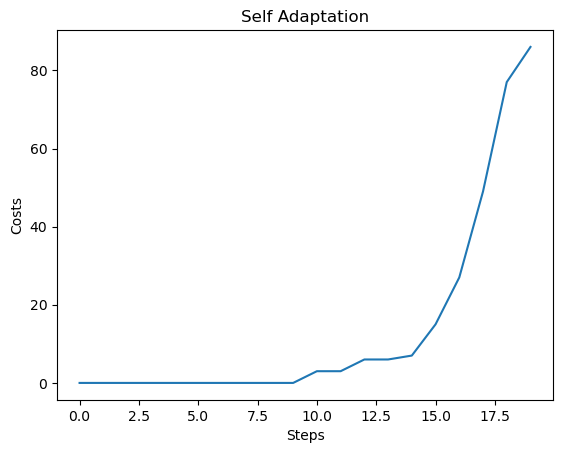

In [14]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

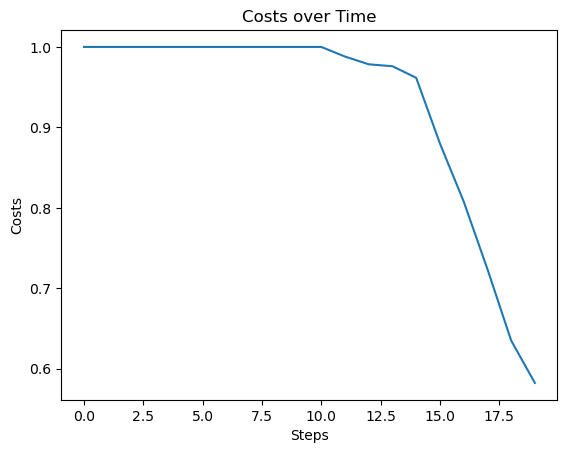

In [15]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

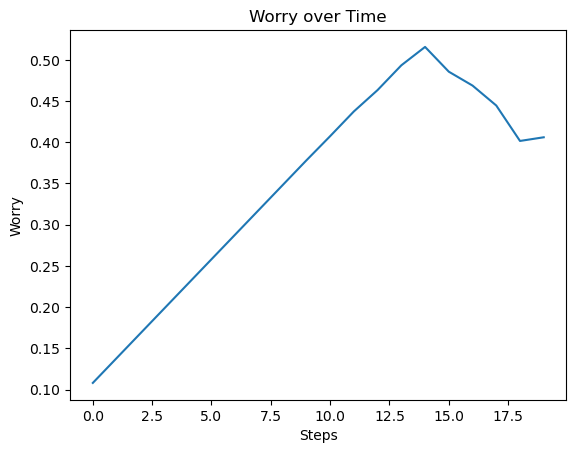

In [16]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

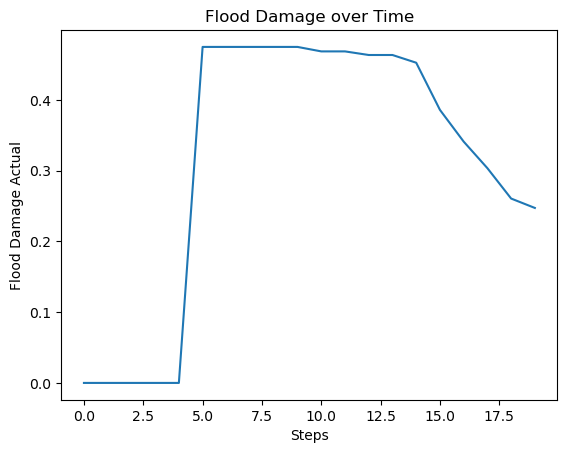

In [17]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [18]:
import pandas as pd

In [19]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

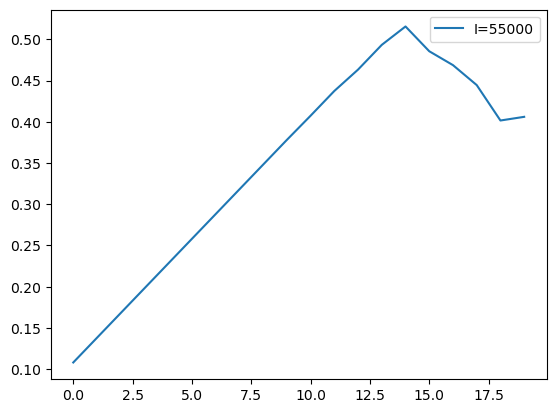

In [20]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

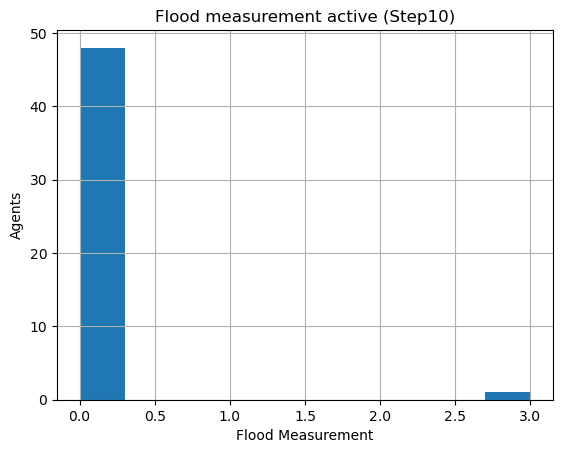

In [21]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

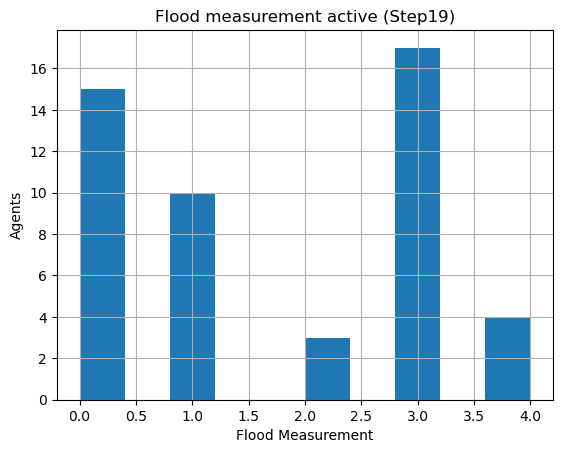

In [22]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

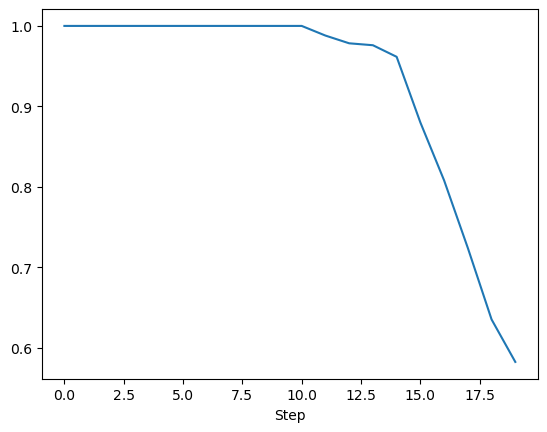

In [23]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [24]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   1.530743              0.722636          0.965838   
     1                   3.814957              0.882077          4.316002   
     2                   0.000000              0.000000          0.000000   
     3                   0.228233              0.390348          0.198609   
     4                   0.585140              0.554731          0.619125   
     5                   2.653606              0.818696          1.484402   
     6                   0.152546              0.320001          0.097806   
     7                   0.391543              0.484585          0.277233   
     8                   0.564526              0.548469          0.364513   
     9                   0.412193              0.493559          0.255212   
     10                  1.467283              0.715244          1.209396   
     11                  0.418296              0.496125          0.489594   
     12                  2.152538              0.782157          1.357194   
     13                  1.695288              0.740463          1.889808   
     14                  0.261464              0.414081          0.290840   
     15                  2.220078              0.787551          2.023810   
     16                  0.000000              0.000000          0.000000   
     17                  0.000000              0.000000          0.000000   
     18                  0.285610              0.429504          0.182108   
     19                  0.000000              0.000000          0.000000   
     20                  0.236736              0.396735          0.127297   
     21                  1.044640              0.655925          0.833224   
     22                  0.000000              0.000000          0.000000   
     23                  0.740810              0.595918          0.664287   
     24                  1.590050              0.729273          1.493184   
     25                  3.544714              0.869249          3.663059   
     26                  0.438880              0.504512          0.456681   
     27                  6.430780              1.000000          3.916466   
     28                  0.589340              0.555980          0.464577   
     29                  0.746432              0.597238          0.849396   
     30                  0.000000              0.000000          0.000000   
     31                  0.314808              0.446499          0.280688   
     32                  0.284512              0.428831          0.248664   
     33                  9.528980              1.000000         10.157796   
     34                  0.560402              0.547189          0.660919   
     35                  0.000000              0.000000          0.000000   
     36                  0.000000              0.000000          0.000000   
     37                  1.618317              0.732350          1.591689   
     38                  2.919415              0.835363          3.073462   
     39                  0.000000              0.000000          0.000000   
     40                  2.375935              0.799397          2.255461   
     41                  0.183597              0.352351          0.118976   
     42                  1.014252              0.650771          1.211719   
     43                  0.674477              0.579539          0.805444   
     44                  0.272747              0.421458          0.206743   
     45                  1.418207              0.709304          1.347473   
     46                  0.953215              0.639934          0.598121   
     47                  0.000000              0.000000          0.000000   
     48                  0.544874              0.542283          0.587595   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

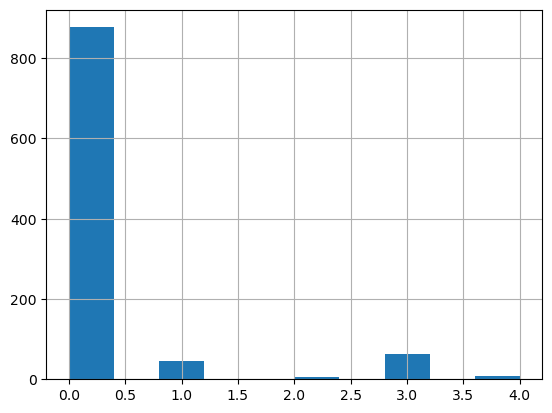

In [25]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [26]:
agent_data['FriendsCount']

Step  AgentID
0     0          2
      1          4
      2          6
      3          2
      4          6
                ..
19    45         2
      46         2
      47         4
      48         3
      49         5
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

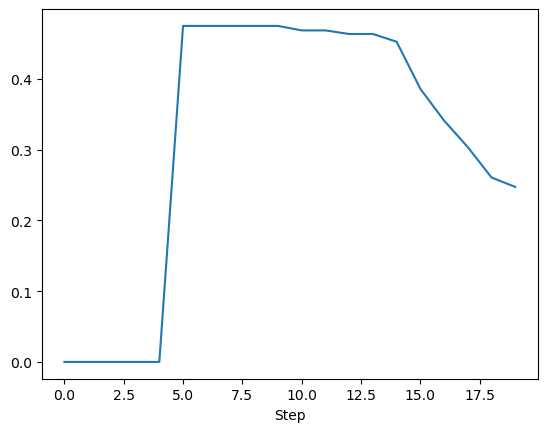

In [27]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

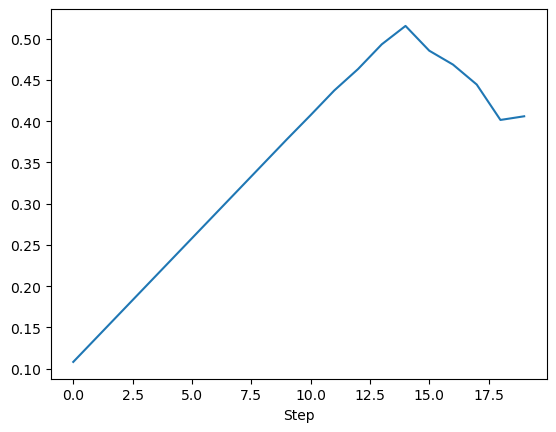

In [28]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [29]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.000
10    0.008
11    0.008
12    0.016
13    0.016
14    0.032
15    0.120
16    0.192
17    0.264
18    0.332
19    0.356
Name: Self_Investment, dtype: float64

In [30]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.2580152517875102

In [31]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.4649623988330813

In [32]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.4714139227439967

In [33]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
